# Similar Melody Detection using Probabilistic Learning

## Problem Statement

> Two song or track X and Y will be called similar melody if both of the tracks are having common Musical Notes(a.k.a Frequency) in their Audio Wave Time series.

## Dependencies citing

In [2]:
!pip3 install --upgrade numpy
!pip3 install --upgrade cython
!pip3 install --upgrade librosa
!pip3 install --upgrade tensorflow
!pip3 install --upgrade keras
!pip3 install --upgrade seaborn

  Using cached numpy-1.20.3-cp39-cp39-macosx_10_9_x86_64.whl (16.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.1
    Uninstalling numpy-1.23.1:
      Successfully uninstalled numpy-1.23.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 2.7 MB/s eta 0:00:00a 0:00:01


In [5]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import librosa

%matplotlib inline

In [6]:
DATA_DIR = f"./data/"
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename)
y


array([-1.4068224e-03, -4.4607223e-04, -4.1098078e-04, ...,
        7.9623060e-06, -3.0417003e-05,  1.2765067e-05], dtype=float32)

In [7]:
y.shape

(117601,)

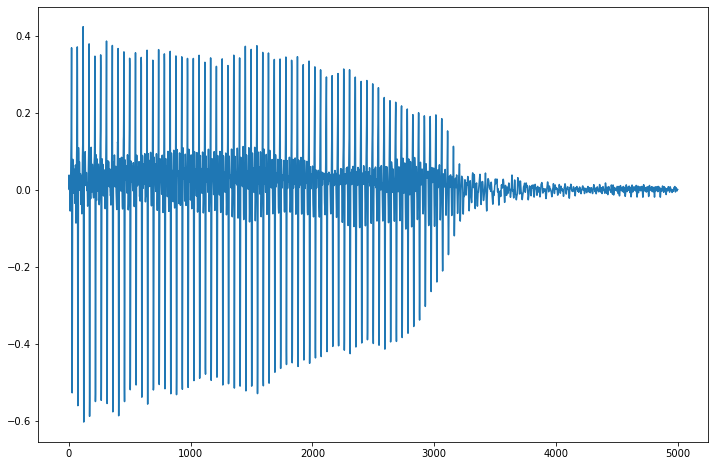

In [27]:
pt.figure(figsize=(12, 8))
pt.plot(y[45000:50000])


pt.show()

In [20]:
sr

22050

In [24]:
import IPython

IPython.display.Audio(librosa.ex('trumpet')).metadata


{}